In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_df=pd.read_excel("Data_Train.xlsx")

In [3]:
test_df=pd.read_excel("Test_set.xlsx")

In [4]:
final_df=train_df.append(test_df)

In [5]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
final_df["Date_of_Journey"].str.split("/").str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [8]:
final_df["Date"]=final_df["Date_of_Journey"].str.split("/").str[0]

In [9]:
final_df["Month"]=final_df["Date_of_Journey"].str.split("/").str[1]

In [10]:
final_df["year"]=final_df["Date_of_Journey"].str.split("/").str[2]

In [11]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [12]:
final_df["Date"]=final_df["Date"].astype(int)

In [13]:
final_df["Month"]=final_df["Date"].astype(int)
final_df["year"]=final_df["Date"].astype(int)

In [14]:
final_df.drop("Date_of_Journey",axis=1,inplace=True)

In [15]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,24,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,9,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,12,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,1,1


In [16]:
final_df["Arrival_Time"].str.split(" ").str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [17]:
final_df["Arrival_hour"]=final_df["Arrival_Time"].str.split(":").str[0]

In [18]:
final_df["Arrival_minute"]=final_df["Arrival_Time"].str.split(":").str[1]

In [19]:
final_df["Arrival_hour"]=final_df["Arrival_hour"].astype(int)

In [20]:
final_df["Arrival_minute"]=final_df["Arrival_hour"].astype(int)

In [21]:
final_df.drop("Arrival_Time",axis=1,inplace=True)

In [22]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,24,24,1,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,1,1,13,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,9,9,4,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,12,12,23,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,1,1,21,21


In [23]:
final_df["Dep_Time"].str.split(" ").str[0]


0       22:20
1       05:50
2       09:25
3       18:05
4       16:50
        ...  
2666    20:30
2667    14:20
2668    21:50
2669    04:00
2670    04:55
Name: Dep_Time, Length: 13354, dtype: object

In [24]:
final_df["dep_hour"]=final_df["Dep_Time"].str.split(":").str[0]

In [25]:
final_df["dep_minute"]=final_df["Dep_Time"].str.split(":").str[1]

In [26]:
final_df["dep_hour"]=final_df["dep_hour"].astype(int)

In [27]:
final_df["dep_minute"]=final_df["dep_minute"].astype(int)

In [28]:
final_df.drop("Dep_Time",axis=1,inplace=True)

In [29]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,24,24,1,1,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,1,1,13,13,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,9,9,4,4,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,12,12,23,23,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,1,1,21,21,16,50


In [30]:
final_df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [31]:
final_df.isnull().sum()


Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
year                  0
Arrival_hour          0
Arrival_minute        0
dep_hour              0
dep_minute            0
dtype: int64

In [32]:
final_df["Total_Stops"].unique(
)

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [33]:
final_df["Total_Stops"]=final_df["Total_Stops"].map({"non-stop": 0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4,"nan":1})

In [34]:
final_df[final_df["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,dep_hour,dep_minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,6,6,9,9,9,45


In [35]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,24,24,1,1,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,1,1,13,13,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,9,9,4,4,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,12,12,23,23,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,1,1,21,21,16,50


In [36]:
final_df.drop("Route",axis=1,inplace=True)

In [37]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,24,24,1,1,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,1,1,13,13,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,9,9,4,4,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,12,12,23,23,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,1,1,21,21,16,50


In [38]:
final_df.drop(6474,axis=0,inplace=True)

In [39]:
final_df.drop(2660,axis=0,inplace=True)

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_minute   13351 non-null  int32  
 12  dep_hour         13351 non-null  int32  
 13  dep_minute       13351 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.2+ MB


In [41]:
final_df["duration_hour"]=final_df["Duration"].str.split(" ").str[0].str.split("h").str[0]

In [42]:
final_df["duration_hour"]=final_df["duration_hour"].astype(int)

In [43]:
final_df.drop("Duration",axis=1,inplace=True)

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  object 
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   year             13351 non-null  int32  
 9   Arrival_hour     13351 non-null  int32  
 10  Arrival_minute   13351 non-null  int32  
 11  dep_hour         13351 non-null  int32  
 12  dep_minute       13351 non-null  int32  
 13  duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(8), object(4)
memory usage: 1.1+ MB


In [45]:
final_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
labelencoder=LabelEncoder()

In [48]:
final_df["Airline"]=labelencoder.fit_transform(final_df["Airline"])

In [49]:
final_df["Source"]=labelencoder.fit_transform(final_df["Source"])
final_df["Destination"]=labelencoder.fit_transform(final_df["Destination"])
final_df["Additional_Info"]=labelencoder.fit_transform(final_df["Additional_Info"])

In [50]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,dep_hour,dep_minute,duration_hour
0,3,0,5,0.0,8,3897.0,24,24,24,1,1,22,20,2
1,1,3,0,2.0,8,7662.0,1,1,1,13,13,5,50,7
2,4,2,1,2.0,8,13882.0,9,9,9,4,4,9,25,19
3,3,3,0,1.0,8,6218.0,12,12,12,23,23,18,5,5
4,3,0,5,1.0,8,13302.0,1,1,1,21,21,16,50,4


In [59]:
final_df["Price"]=labelencoder.fit_transform(final_df["Price"])

In [60]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,dep_hour,dep_minute,duration_hour
0,3,0,5,0.0,8,65,24,24,24,1,1,22,20,2
1,1,3,0,2.0,8,669,1,1,1,13,13,5,50,7
2,4,2,1,2.0,8,1537,9,9,9,4,4,9,25,19
3,3,3,0,1.0,8,389,12,12,12,23,23,18,5,5
4,3,0,5,1.0,8,1457,1,1,1,21,21,16,50,4


In [63]:
final_df["Total_Stops"]=labelencoder.fit_transform(final_df["Total_Stops"])

In [64]:
final_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
year               0
Arrival_hour       0
Arrival_minute     0
dep_hour           0
dep_minute         0
duration_hour      0
dtype: int64

In [65]:
X=final_df.drop(columns=["Price"],axis=1)

In [66]:
y=final_df["Price"]

In [67]:
X.shape

(13351, 13)

In [68]:
y.shape

(13351,)

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape


((10680, 13), (2671, 13))

In [70]:
y_train.shape,y_test.shape

((10680,), (2671,))

In [71]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
y_pred = reg_rf.predict(X_test)

In [73]:
reg_rf.score(X_train, y_train)

0.7158670754647742

In [74]:
reg_rf.score(X_test, y_test)

0.2118165147136455

c:\users\lalith\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


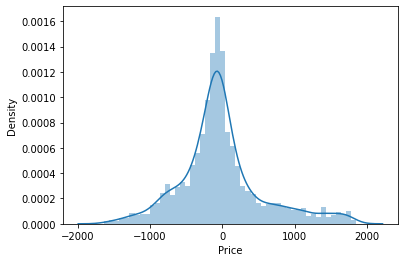

In [75]:
sns.distplot(y_test-y_pred)
plt.show()

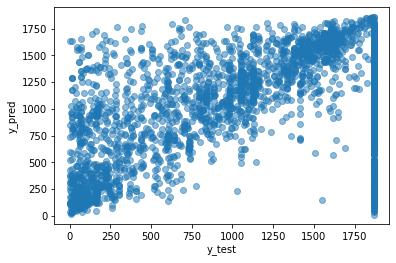

In [76]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [77]:
from sklearn import metrics

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
MAE: 1172.5455945373583
MSE: 4347276.1614450775
RMSE: 2085.0122688955757

MAE: 407.94060865963354
MSE: 339493.1153094682
RMSE: 582.6603773292536


In [79]:
2090.5509/(max(y)-min(y))

1.1179416577540109

In [80]:
metrics.r2_score(y_test, y_pred)

0.2118165147136455